In [17]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

PARQUET_DIR = Path(r"C:\Users\nimro\PolyQuant-features\outputs\features")
files = sorted(PARQUET_DIR.glob("features_chunk_*.parquet"))

In [ ]:
edges = []

for f in files:
    df = pd.read_parquet(f, columns=["edge"])
    edges.append(df["edge"])

avg_edge = pd.concat(edges).mean()

avg_edge

np.float64(-0.0035187955561643757)

In [11]:
threshold = np.log1p(10000)   # log(1+100)

edges = []

for f in files:
    df = pd.read_parquet(f, columns=["edge", "log_usdc_size"])
    mask = df["log_usdc_size"] > threshold
    edges.append(df.loc[mask, "edge"])

avg_edge_large = pd.concat(edges).mean()
avg_edge_large


np.float64(0.005787869234192341)

In [18]:
all_log = []
all_edge = []

for f in files:
    df = pd.read_parquet(f, columns=["edge", "log_usdc_size"])
    all_log.append(df["log_usdc_size"])
    all_edge.append(df["edge"])

log_usdc = pd.concat(all_log).reset_index(drop=True)
edges = pd.concat(all_edge).reset_index(drop=True)

usdc_size = np.expm1(log_usdc)  # invert log1p

# Use 0–99.9% range to ignore extreme outliers in bins
max_size = usdc_size.quantile(0.999)

# Bin edges in USDC
num_bins = 40
thresholds_usdc = np.linspace(0.0, max_size, num_bins + 1)

# Average edge for trades with size > threshold (use left edges as thresholds)
avg_edges = []
for t in thresholds_usdc[:-1]:
    mask = usdc_size > t
    if mask.any():
        avg_edges.append(edges[mask].mean())
    else:
        avg_edges.append(np.nan)

avg_edges = np.array(avg_edges)

# Histogram: counts per bucket
counts, bin_edges = np.histogram(usdc_size, bins=thresholds_usdc)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

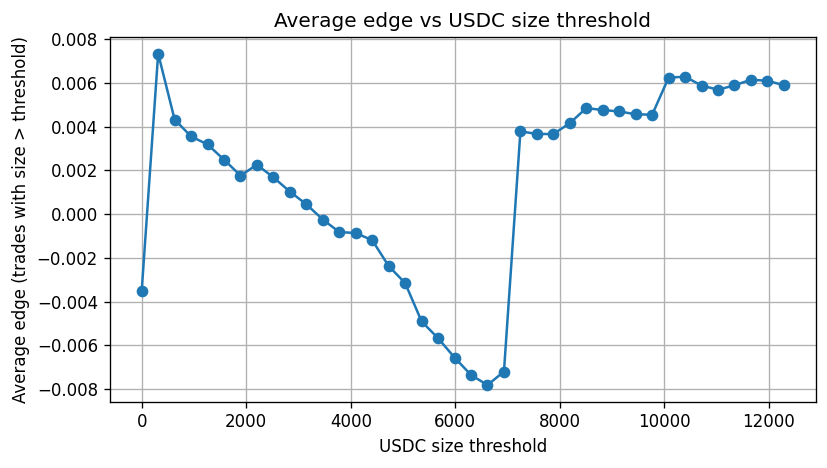

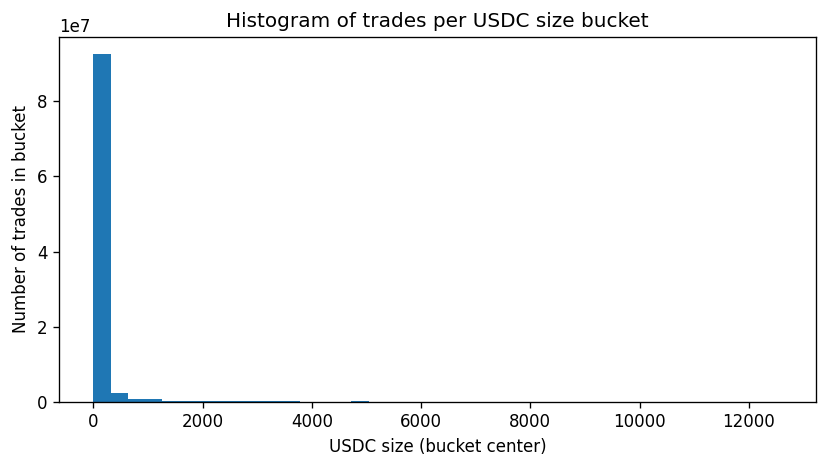

In [22]:
plt.figure(figsize=(7, 4), dpi=120)
plt.plot(thresholds_usdc[:-1], avg_edges, marker="o")
plt.xlabel("USDC size threshold")
plt.ylabel("Average edge (trades with size > threshold)")
plt.title("Average edge vs USDC size threshold")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4), dpi=120)
plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]))
plt.xlabel("USDC size (bucket center)")
plt.ylabel("Number of trades in bucket")
plt.title("Histogram of trades per USDC size bucket")
plt.tight_layout()
plt.show()


In [26]:
all_log = []
all_winrate = []

for f in files:
    df = pd.read_parquet(f, columns=["edge", "log_usdc_size"])
    all_log.append(df["log_usdc_size"])
    all_winrate.append(np.sign(df["edge"]))

log_usdc = pd.concat(all_log).reset_index(drop=True)
winrates = pd.concat(all_edge).reset_index(drop=True)

usdc_size = np.expm1(log_usdc)  # invert log1p

# Use 0–99.9% range to ignore extreme outliers in bins
max_size = usdc_size.quantile(0.999)

# Bin winrates in USDC
num_bins = 40
thresholds_usdc = np.linspace(0.0, max_size, num_bins + 1)

# Average edge for trades with size > threshold (use left winrates as thresholds)
avg_winrates = []
for t in thresholds_usdc[:-1]:
    mask = usdc_size > t
    if mask.any():
        avg_winrates.append(winrates[mask].mean())
    else:
        avg_winrates.append(np.nan)

avg_winrates = np.array(avg_winrates)

# Histogram: counts per bucket
counts, bin_winrates = np.histogram(usdc_size, bins=thresholds_usdc)
bin_centers = 0.5 * (bin_winrates[:-1] + bin_winrates[1:])

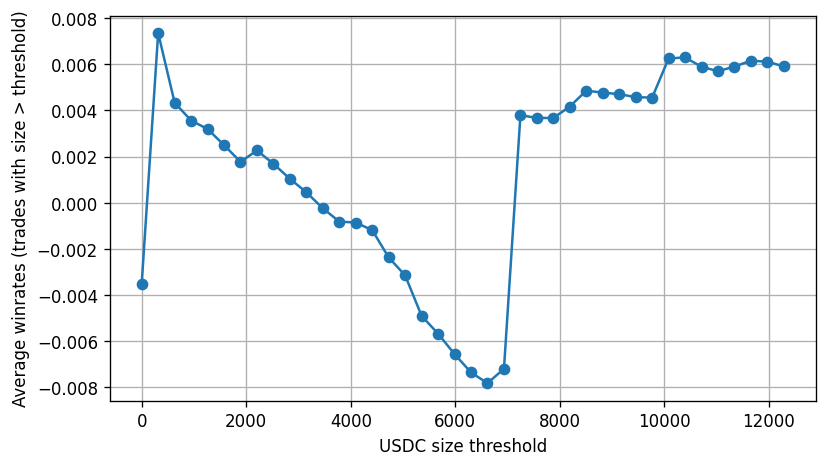

In [27]:
plt.figure(figsize=(7, 4), dpi=120)
plt.plot(thresholds_usdc[:-1], avg_winrates, marker="o")
plt.xlabel("USDC size threshold")
plt.ylabel("Average winrates (trades with size > threshold)")
plt.grid(True)
plt.tight_layout()
plt.show()